<a href="https://colab.research.google.com/github/dr-irani/Quantifying-Bias-Contextualized-Embeddings/blob/master/SEAT_Scores.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install transformers
import matplotlib.pyplot as plt
% matplotlib inline

import seaborn as sns

from google.colab import drive
drive.mount('/content/drive')

     |████████████████████████████████| 645kB 2.8MB/s 
     |████████████████████████████████| 3.8MB 8.8MB/s 
     |████████████████████████████████| 1.0MB 32.9MB/s 
     |████████████████████████████████| 890kB 48.6MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.43-cp36-none-any.whl size=893260 sha256=0875498102ec5764d23729e0afb22d9eaeb5599190669b55422cddff911901e0
  Stored in directory: /root/.cache/pip/wheels/29/3c/fd/7ce5c3f0666dab31a50123635e6fb5e19ceb42ce38d4e58f45
Successfully built sacremoses


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
from compute_seat import SEAT, create_target_attribute_lists, A_words, B_words

with open('/content/drive/My Drive/Deep Learning/Names/40_white_names.txt', 'r') as f:
    X_words = f.read().splitlines()
with open('/content/drive/My Drive/Deep Learning/Names/40_black_names.txt', 'r') as f:
    Y_words = f.read().splitlines()

A, B, X, Y = create_target_attribute_lists(X_words, Y_words, A_words, B_words)

Hate Speech and Offensive Language

In [3]:
seat = SEAT('./drive/My Drive/Deep Learning/BERT Fine-Tuning/HateSpeechDetection/model_save/')
m_hate, seat_score_hate, effect_size_hate, p_value_hate = seat.run_seat(A, B, X, Y)
print("seat score: %f" % seat_score_hate)
print("effect size: %f" % effect_size_hate)
print("p value: %f" % p_value_hate)

Equalities contributed 1/12870 to p-value
seat score: 0.097999
effect size: 0.536581
p value: 0.147086


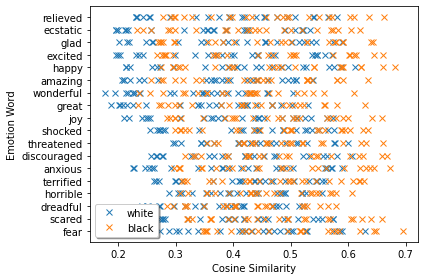

In [21]:
targ_size = len(X)
attr_size = len(A)

fig = plt.figure()
ax = plt.subplot(111)
emotions = A_words + B_words

for i in range(m_hate.shape[0]):
  if i < targ_size:
    race = "white"
    c = 'C0'
  else:
    race = "black"
    c = 'C1'    
  for j in range(m_hate.shape[1]):
    ax.plot(m_hate[i, j], emotions[j//3], 'x', color=c, label=race if (i==0 or i==targ_size) and j==0 else "")

ax.legend(loc='best', ncol=1, fancybox=True, shadow=True)
plt.xlabel('Cosine Similarity')
plt.ylabel('Emotion Word')
plt.tight_layout()
plt.savefig('/content/names_seat_hate.png')

MRSP

In [5]:
seat = SEAT('./drive/My Drive/Deep Learning/BERT Fine-Tuning/MRPC/model_save/')
m_msrp, seat_score_msrp, effect_size_msrp, p_value_msrp = seat.run_seat(A, B, X, Y)
print("seat score: %f" % seat_score_msrp)
print("effect size: %f" % effect_size_msrp)
print("p value: %f" % p_value_msrp)

Equalities contributed 1/12870 to p-value
seat score: 0.052163
effect size: 0.197856
p value: 0.346853


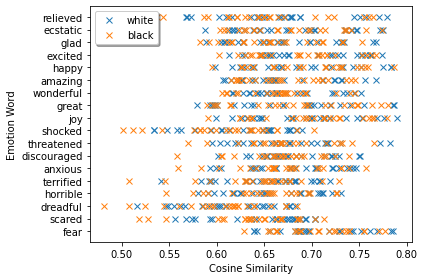

In [20]:
targ_size = len(X)
attr_size = len(A)

fig = plt.figure()
ax = plt.subplot(111)
emotions = A_words + B_words

for i in range(m_msrp.shape[0]):
  if i < targ_size:
    race = "white"
    c = 'C0'
  else:
    race = "black"
    c = 'C1'    
  for j in range(m_msrp.shape[1]):
    ax.plot(m_msrp[i, j], emotions[j//3], 'x', color=c, label=race if (i==0 or i==targ_size) and j==0 else "")

ax.legend(loc='best', ncol=1, fancybox=True, shadow=True)
plt.xlabel('Cosine Similarity')
plt.ylabel('Emotion Word')
plt.tight_layout()
plt.savefig('/content/names_seat_msrp.png')

COVID

In [7]:
seat = SEAT('./drive/My Drive/Deep Learning/BERT Fine-Tuning/bert-covid/')
m_covid, seat_score_covid, effect_size_covid, p_value_covid = seat.run_seat(A, B, X, Y)
print("seat score: %f" % seat_score_covid)
print("effect size: %f" % effect_size_covid)
print("p value: %f" % p_value_covid)

Equalities contributed 1/12870 to p-value
seat score: 0.487362
effect size: 0.573444
p value: 0.132168


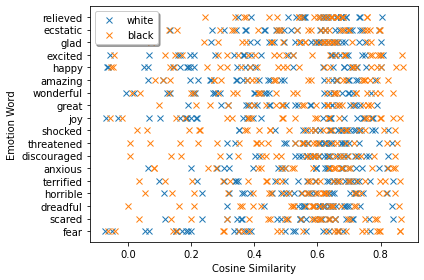

In [19]:
targ_size = len(X)
attr_size = len(A)

fig = plt.figure()
ax = plt.subplot(111)
emotions = A_words + B_words

for i in range(m_covid.shape[0]):
  if i < targ_size:
    race = "white"
    c = 'C0'
  else:
    race = "black"
    c = 'C1'    
  for j in range(m_covid.shape[1]):
    ax.plot(m_covid[i, j], emotions[j//3], 'x', color=c, label=race if (i==0 or i==targ_size) and j==0 else "")

ax.legend(loc='best', ncol=1, fancybox=True, shadow=True)
plt.xlabel('Cosine Similarity')
plt.ylabel('Emotion Word')
plt.tight_layout()
plt.savefig('/content/names_seat_covid.png')

Jigsaws Toxic

In [9]:
seat = SEAT('./drive/My Drive/Deep Learning/BERT Fine-Tuning/JIGSAWS/model_save')
m_jigsaws, seat_score_jigsaws, effect_size_jigsaws, p_value_jigsaws = seat.run_seat(A, B, X, Y)
print("seat score: %f" % seat_score_jigsaws)
print("effect size: %f" % effect_size_jigsaws)
print("p value: %f" % p_value_jigsaws)

Equalities contributed 1/12870 to p-value
seat score: -0.835163
effect size: -1.762451
p value: 0.000078


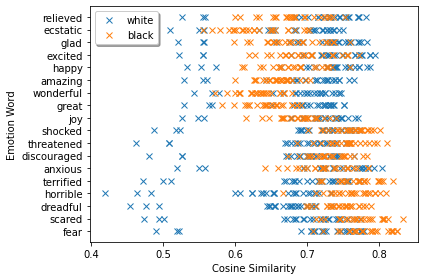

In [18]:
targ_size = len(X)
attr_size = len(A)

fig = plt.figure()
ax = plt.subplot(111)
emotions = A_words + B_words

for i in range(m_jigsaws.shape[0]):
  if i < targ_size:
    race = "white"
    c = 'C0'
  else:
    race = "black"
    c = 'C1'    
  for j in range(m_jigsaws.shape[1]):
    ax.plot(m_jigsaws[i, j], emotions[j//3], 'x', color=c, label=race if (i==0 or i==targ_size) and j==0 else "")

ax.legend(loc='best', ncol=1, fancybox=True, shadow=True)
plt.xlabel('Cosine Similarity')
plt.ylabel('Emotion Word')
plt.tight_layout()
plt.savefig('/content/names_seat_jigsaws.png')

Pre-trained

In [11]:
seat = SEAT('bert-base-uncased')
m_base, seat_score_base, effect_size_base, p_value_base = seat.run_seat(A, B, X, Y)
print("seat score: %f" % seat_score_base)
print("effect size: %f" % effect_size_base)
print("p value: %f" % p_value_base)


Equalities contributed 1/12870 to p-value
seat score: -0.021137
effect size: -0.540788
p value: 0.144911


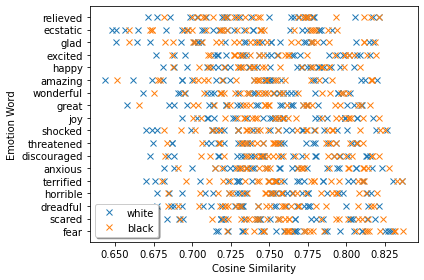

In [17]:
targ_size = len(X)
attr_size = len(A)

fig = plt.figure()
ax = plt.subplot(111)
emotions = A_words + B_words

for i in range(m_base.shape[0]):
  if i < targ_size:
    race = "white"
    c = 'C0'
  else:
    race = "black"
    c = 'C1'    
  for j in range(m_base.shape[1]):
    ax.plot(m_base[i, j], emotions[j//3], 'x', color=c, label=race if (i==0 or i==targ_size) and j==0 else "")

ax.legend(loc='best', ncol=1, fancybox=True, shadow=True)
plt.xlabel('Cosine Similarity')
plt.ylabel('Emotion Word')
plt.tight_layout()
plt.savefig('/content/names_seat_base.png')

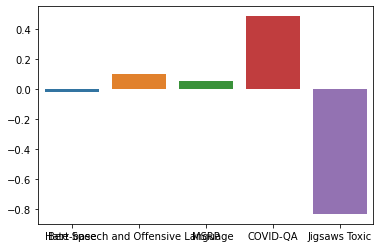

In [13]:
sns.barplot(x=['Bert-base', 'Hate Speech and Offensive Language', 'MSRP', 'COVID-QA', 'Jigsaws Toxic'], y=[seat_score_base, seat_score_hate, seat_score_msrp, seat_score_covid, seat_score_jigsaws])

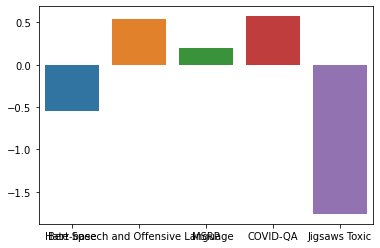

In [14]:
sns.barplot(x=['Bert-base', 'Hate Speech and Offensive Language', 'MSRP', 'COVID-QA', 'Jigsaws Toxic'], y=[effect_size_base, effect_size_hate, effect_size_msrp, effect_size_covid, effect_size_jigsaws])